In [1]:
from briefcase.case import Case
from briefcase.case_base import CaseBase
import import_ipynb
import pandas as pd
import matplotlib.pyplot as plt
import TelcoConverter as TC

def test_inconsistency(data):
    cases = [Case.from_dict(c) for c in data]
    cb = CaseBase(cases)  # Todo this is really really slow, but do we care?
    return cb.metrics()


def generate_data_and_plot(cluster="corr"):
    percentage_test = [0.05, 0.25, 0.5, 0.75]
    inconsistency_counts = []
    test_sizes = []
    test_sizes_1perc_power = []
    inconsistency_counts_1perc_power = []

    for param in percentage_test:
        test_data = TC.get_existing_test_data(cluster, str(param))
        test_size, inconsistency_count = test_inconsistency(test_data)
        test_size_1perc_power, inconsistency_count_1perc_power = test_inconsistency(TC.filter_data_by_power(test_data, 1))
        
        test_sizes.append(test_size)
        inconsistency_counts.append(inconsistency_count)
        
        test_sizes_1perc_power.append(test_size_1perc_power)
        inconsistency_counts_1perc_power.append(inconsistency_count_1perc_power)

    # Create a DataFrame
    df = pd.DataFrame({
        'Number of entries in test data': test_sizes,
        'Inconsistency Count': inconsistency_counts
    })
    
    power_reduced_df = pd.DataFrame({
        'Number of entries in test data': test_sizes_1perc_power,
        'Inconsistency Count': inconsistency_counts_1perc_power
    })

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df['Number of entries in test data'], df['Inconsistency Count'], marker='o', linestyle='-')
    plt.title(f'Test Inconsistency vs Size of test data for {cluster} clustering')
    plt.xlabel('Number of entries in test data')
    plt.ylabel('Inconsistency Count')
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.plot(power_reduced_df['Number of entries in test data'], power_reduced_df['Inconsistency Count'], marker='o', linestyle='-')
    plt.title(f'Test Inconsistency vs Size of test data for {cluster} clustering, in a reduced case power dataset, 1% of the maximum power')
    plt.xlabel('Number of entries in test data')
    plt.ylabel('Inconsistency Count')
    plt.grid(True)
    plt.show()


importing Jupyter notebook from TelcoConverter.ipynb
Number of factors by type:
PI factors: 10 - ['PaperlessBilling', 'InternetService_Fiber optic', 'OnlineSecurity_False', 'OnlineBackup_False', 'DeviceProtection_False', 'TechSupport_False', 'StreamingTV_False', 'StreamingMovies_False', 'Contract_Month-to-month', 'PaymentMethod_Electronic check']
Delta factors: 9 - ['Partner', 'Dependents', 'InternetService_DSL', 'InternetService_No', 'OnlineSecurity_True', 'TechSupport_True', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)']
UN factors: 12 - ['PhoneService', 'gender_Female', 'gender_Male', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'OnlineBackup_True', 'DeviceProtection_True', 'StreamingTV_True', 'StreamingMovies_True', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Mailed check']


### Random clustering
This does not technically depend on the size of the training data, since the training data is never used, but for comparability we will test it on the same splits

Loaded data successfully from 'data/telco-rand-test-0.05-False.yaml'
Number of cases:  352
Number of cases associated with inconsistency:  74
Maximum number of edges on a pi case: 1073725440
Maximum number of edges on a delta case: 1073709056
Factors for pi: 15
Factors for delta: 16
Number of cases:  352
Number of cases associated with inconsistency:  74
Maximum number of edges on a pi case: 1073725440
Maximum number of edges on a delta case: 1073709056
Factors for pi: 15
Factors for delta: 16
Loaded data successfully from 'data/telco-rand-test-0.25-False.yaml'
Number of cases:  1760
Number of cases associated with inconsistency:  875
Maximum number of edges on a pi case: 1073725440
Maximum number of edges on a delta case: 1073709056
Factors for pi: 15
Factors for delta: 16
Number of cases:  1757
Number of cases associated with inconsistency:  864
Maximum number of edges on a pi case: 1073725440
Maximum number of edges on a delta case: 1073709056
Factors for pi: 15
Factors for delta: 1

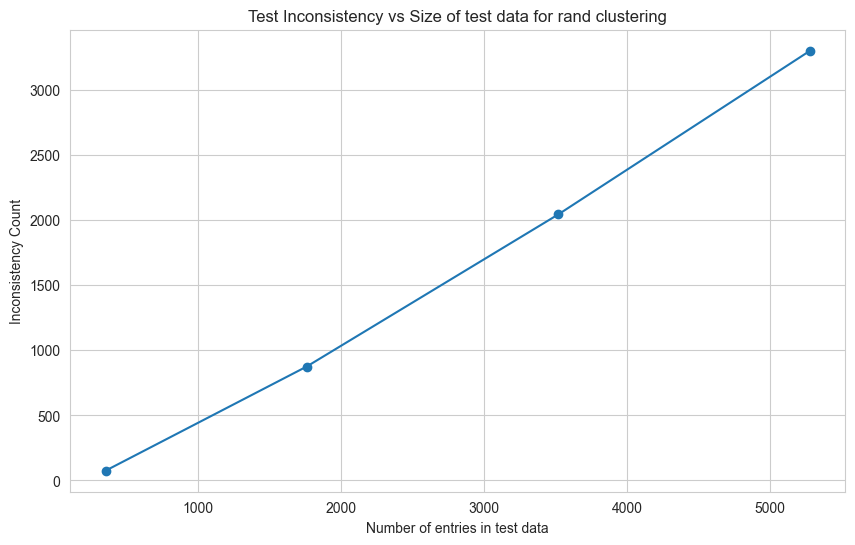

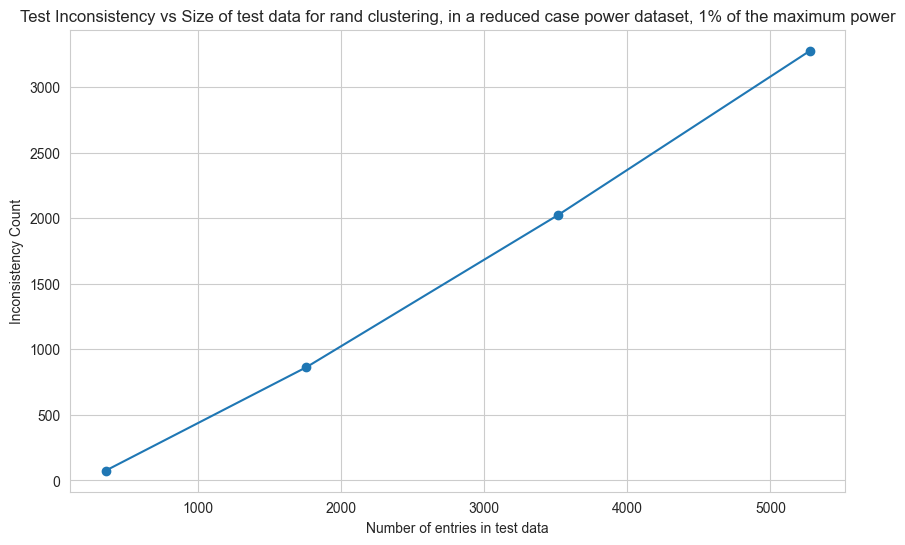

In [2]:
generate_data_and_plot("rand") # random seed = 42

File 'data/telco-rand_un-test-0.05-False.yaml' not found.
Creating new file
Number of factors by type:
PI factors: 9 - ['Dependents', 'gender_Female', 'InternetService_No', 'OnlineBackup_False', 'TechSupport_True', 'StreamingTV_False', 'StreamingMovies_True', 'Contract_Month-to-month', 'Contract_One year']
Delta factors: 9 - ['MultipleLines_No', 'OnlineSecurity_True', 'OnlineBackup_True', 'DeviceProtection_False', 'DeviceProtection_True', 'TechSupport_False', 'StreamingTV_True', 'StreamingMovies_False', 'PaymentMethod_Electronic check']
UN factors: 13 - ['Partner', 'PhoneService', 'PaperlessBilling', 'gender_Male', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_False', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check']
Number of cases:  341
Number of cases associated with inconsistency:  180
Maximum number of edges on a pi cas

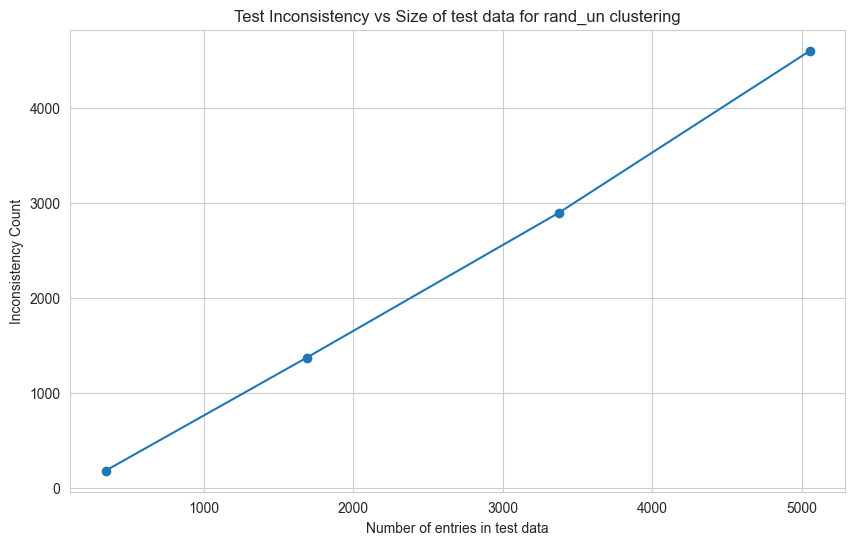

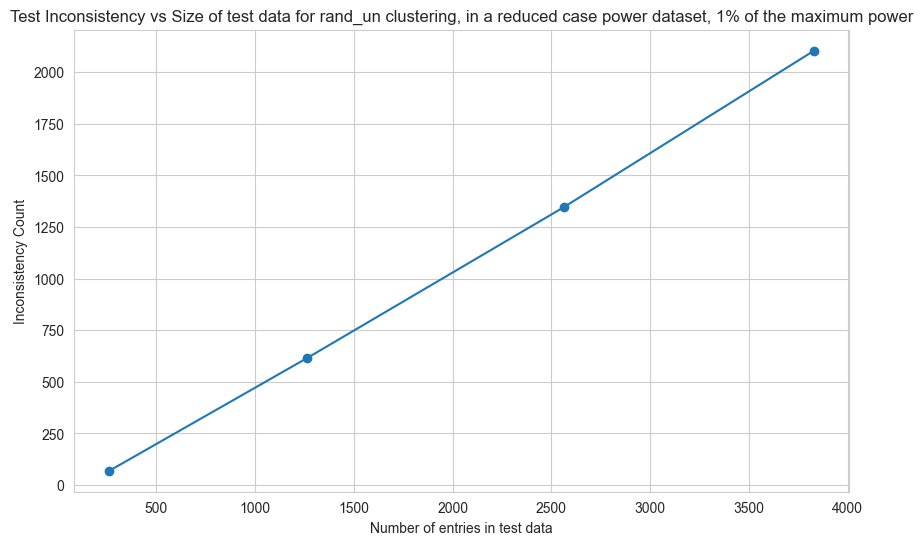

In [3]:
generate_data_and_plot("rand_un")


File 'data/telco-corr-test-0.05-False.yaml' not found.
Creating new file
Number of factors by type:
PI factors: 10 - ['PaperlessBilling', 'InternetService_Fiber optic', 'OnlineSecurity_False', 'OnlineBackup_False', 'DeviceProtection_False', 'TechSupport_False', 'StreamingTV_False', 'StreamingMovies_False', 'Contract_Month-to-month', 'PaymentMethod_Electronic check']
Delta factors: 10 - ['Partner', 'Dependents', 'InternetService_DSL', 'InternetService_No', 'OnlineSecurity_True', 'TechSupport_True', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)']
UN factors: 11 - ['PhoneService', 'gender_Female', 'gender_Male', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'OnlineBackup_True', 'DeviceProtection_True', 'StreamingTV_True', 'StreamingMovies_True', 'PaymentMethod_Mailed check']
Number of cases:  278
Number of cases associated with inconsistency:  90
Maximum number of edges on a pi case:

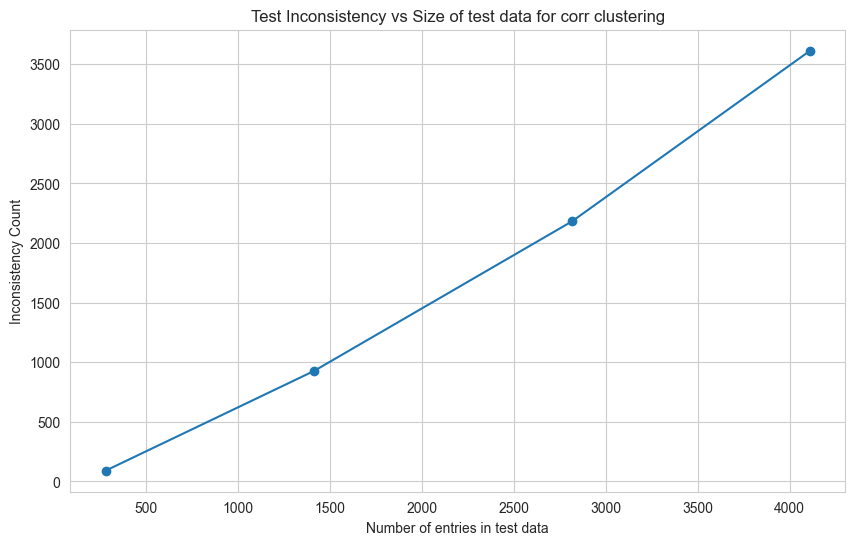

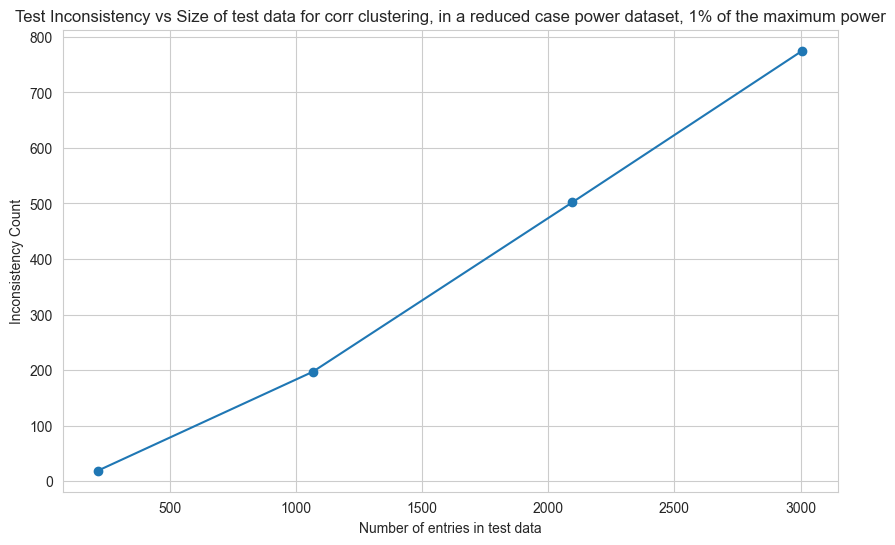

In [4]:
generate_data_and_plot("corr") 


There are way more cases with not Churn than Churn, so we have to proportionally sample before voting 

Loaded data successfully from 'data/telco-vote-test-0.05-False.yaml'
Number of cases:  334
Number of cases associated with inconsistency:  100
Maximum number of edges on a pi case: 1073725440
Maximum number of edges on a delta case: 1073709056
Factors for pi: 15
Factors for delta: 16
Number of cases:  322
Number of cases associated with inconsistency:  55
Maximum number of edges on a pi case: 1073725440
Maximum number of edges on a delta case: 1073709056
Factors for pi: 15
Factors for delta: 16
Loaded data successfully from 'data/telco-vote-test-0.25-False.yaml'
Number of cases:  1731
Number of cases associated with inconsistency:  845
Maximum number of edges on a pi case: 1073725440
Maximum number of edges on a delta case: 1073709056
Factors for pi: 15
Factors for delta: 16
Number of cases:  1614
Number of cases associated with inconsistency:  497
Maximum number of edges on a pi case: 1073725440
Maximum number of edges on a delta case: 1073709056
Factors for pi: 15
Factors for delta: 

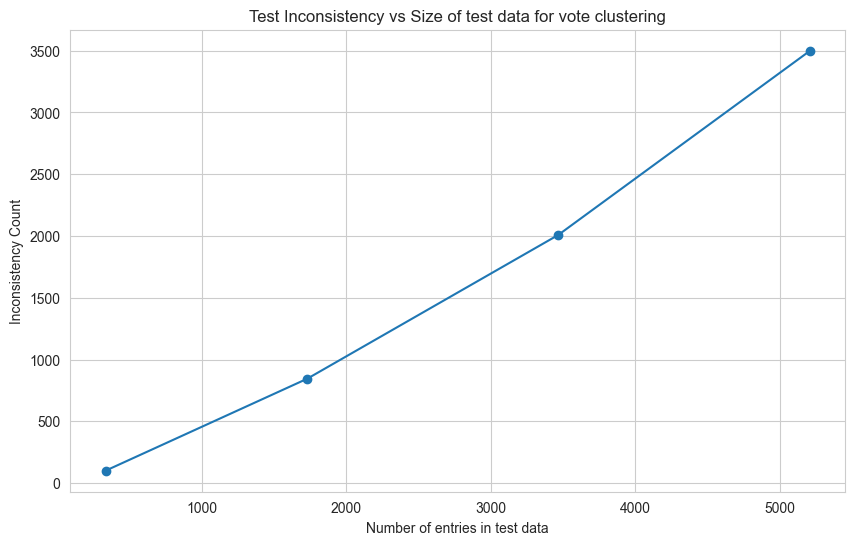

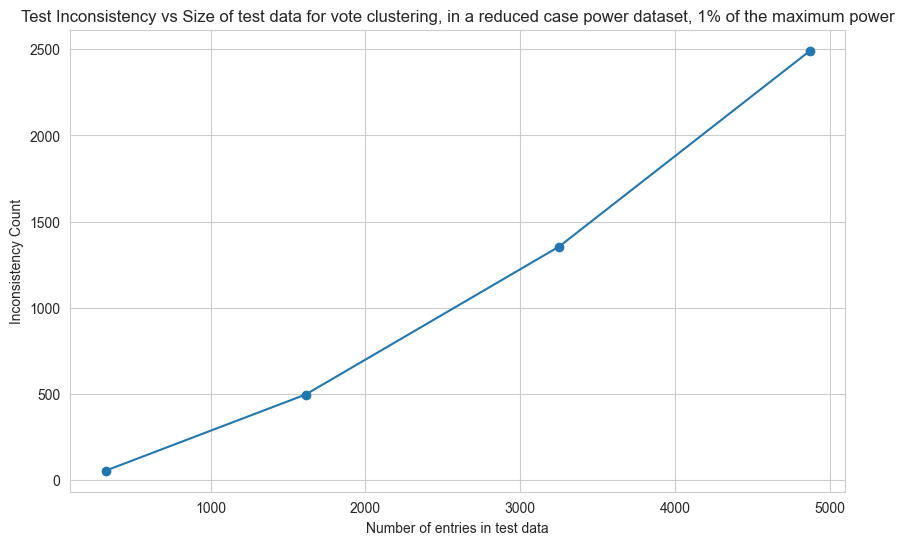

In [2]:
generate_data_and_plot("vote")